In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
import random as rd 
import datetime 
import matplotlib.pyplot as plt 
import seaborn as sns
from math import ceil
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [77]:
sales=pd.read_csv("/content/drive/MyDrive/competitive_data_science_predict_future_sales/sales_train.csv")
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [78]:
item_categories=pd.read_csv("/content/drive/MyDrive/competitive_data_science_predict_future_sales/item_categories.csv")
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [79]:
items=pd.read_csv("/content/drive/MyDrive/competitive_data_science_predict_future_sales/items.csv")
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [80]:
shops=pd.read_csv("/content/drive/MyDrive/competitive_data_science_predict_future_sales/shops.csv")
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [81]:
test=pd.read_csv("/content/drive/MyDrive/competitive_data_science_predict_future_sales/test.csv")
test.head()


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# EDA

**Univariate Analysis**

In [82]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


***We can see there are outliars like the minimum value of item price and item count are negative and the maximum values are quite high compared to the means and the 75th percentile values.***

**Item Price**

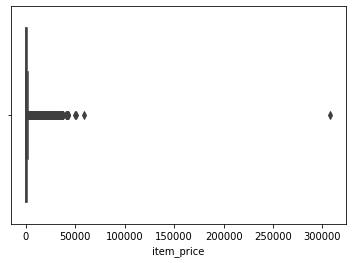

In [83]:
sns.boxplot(x=sales["item_price"])

In [84]:
for i in range(0,100,10):
    var =sales["item_price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -1.0
10 percentile value is 149.0
20 percentile value is 199.0
30 percentile value is 299.0
40 percentile value is 349.0
50 percentile value is 399.0
60 percentile value is 599.0
70 percentile value is 799.0
80 percentile value is 1199.0
90 percentile value is 1999.0
100 percentile value is  307980.0


In [85]:
for i in range(90,100,1):
    var =sales["item_price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 1999.0
91 percentile value is 2090.0
92 percentile value is 2299.0
93 percentile value is 2499.0
94 percentile value is 2599.0
95 percentile value is 2690.0
96 percentile value is 2999.0
97 percentile value is 3190.0
98 percentile value is 3590.0
99 percentile value is 5999.0
100 percentile value is  307980.0


In [86]:
for i in np.arange(0.0, 1.0, 0.1):
    var =sales["item_price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 5999.0
99.1 percentile value is 6999.0
99.2 percentile value is 8649.0
99.3 percentile value is 9990.0
99.4 percentile value is 11490.0
99.5 percentile value is 13490.0
99.6 percentile value is 14490.0
99.7 percentile value is 17990.0
99.8 percentile value is 20990.0
99.9 percentile value is 23990.0
100 percentile value is  307980.0


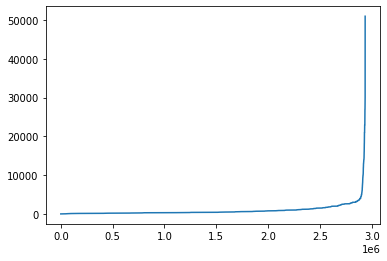

In [87]:
plt.plot(var[:-2])
plt.show()

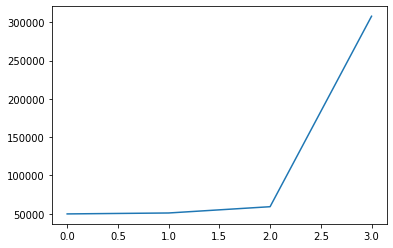

In [88]:
plt.plot(var[-4:])
plt.show()

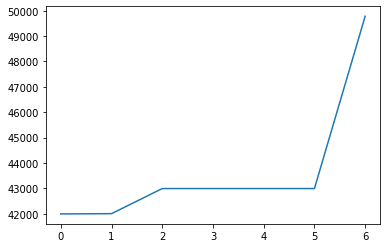

In [89]:
plt.plot(var[-10:-3])
plt.show()

***There is a jump at around 43000. So we can treat anything above 43000 as outliers***

**Item_cnt_day**

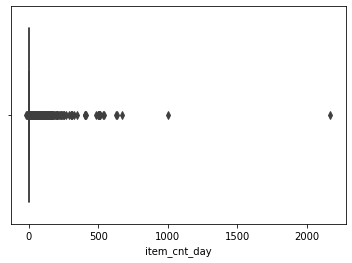

In [90]:
sns.boxplot(x=sales["item_cnt_day"])

In [91]:
for i in range(0,100,10):
    var =sales["item_cnt_day"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -22.0
10 percentile value is 1.0
20 percentile value is 1.0
30 percentile value is 1.0
40 percentile value is 1.0
50 percentile value is 1.0
60 percentile value is 1.0
70 percentile value is 1.0
80 percentile value is 1.0
90 percentile value is 2.0
100 percentile value is  2169.0


In [92]:
for i in range(90,100,1):
    var =sales["item_cnt_day"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 2.0
91 percentile value is 2.0
92 percentile value is 2.0
93 percentile value is 2.0
94 percentile value is 2.0
95 percentile value is 2.0
96 percentile value is 2.0
97 percentile value is 3.0
98 percentile value is 3.0
99 percentile value is 5.0
100 percentile value is  2169.0


In [93]:
for i in np.arange(0.0, 1.0, 0.1):
    var =sales["item_cnt_day"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 5.0
99.1 percentile value is 6.0
99.2 percentile value is 6.0
99.3 percentile value is 7.0
99.4 percentile value is 7.0
99.5 percentile value is 8.0
99.6 percentile value is 10.0
99.7 percentile value is 12.0
99.8 percentile value is 15.0
99.9 percentile value is 22.0
100 percentile value is  2169.0


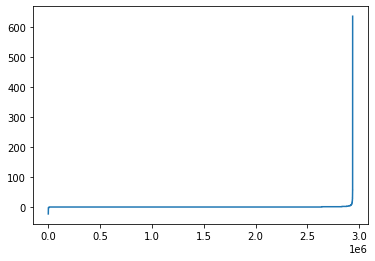

In [94]:
plt.plot(var[:-3])
plt.show()

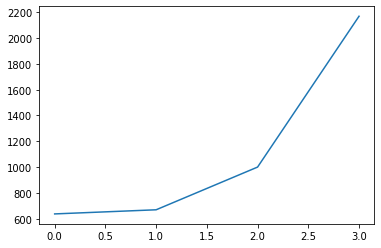

In [95]:
plt.plot(var[-4:])
plt.show()

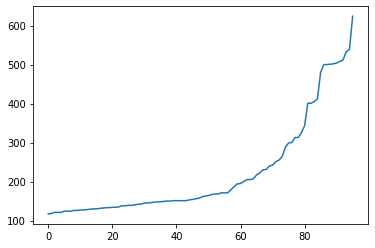

In [96]:
plt.plot(var[-100:-4])
plt.show()

***We can observe jump at around 550. So anything above that we treat as outlier***

# Outlier Removal

In [97]:
sales=sales[sales.item_price>0]
sales=sales[sales.item_price<43000]
sales=sales[sales.item_cnt_day>=0]
sales=sales[sales.item_cnt_day<550]


In [98]:
sales.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

***No null values***

In [99]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.928483e+06,2.928483e+06,2.928483e+06,2.928483e+06,2.928483e+06
mean,1.456974e+01,3.300300e+01,1.020028e+04,8.893079e+02,1.246599e+00
std,9.422942e+00,1.622542e+01,6.324400e+03,1.717330e+03,2.119973e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.477000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.355000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.569100e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,4.299000e+04,5.390000e+02


**Bi-Variate Analysis**

# Monthly Item Sales

[Text(0.5, 1.0, 'Monthly Item Sales')]

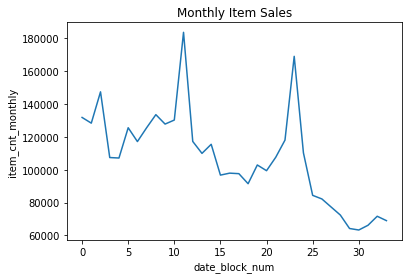

In [100]:
monthly_sales=pd.DataFrame(sales.groupby(["date_block_num"])["item_cnt_day"].sum().reset_index())
monthly_sales.rename(columns = {'item_cnt_day':'item_cnt_monthly'}, inplace = True)
sns.lineplot(data=monthly_sales,x="date_block_num",y="item_cnt_monthly").set(
    title="Monthly Item Sales")

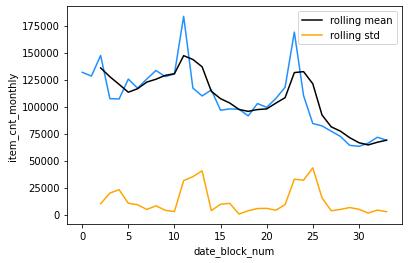

In [101]:
rolling_window = 3
sns.lineplot(data=monthly_sales,x="date_block_num",y="item_cnt_monthly",color='dodgerblue')
sns.lineplot(x=monthly_sales['date_block_num'], y=monthly_sales['item_cnt_monthly'].rolling(rolling_window).mean(), color='black', label='rolling mean')
sns.lineplot(x=monthly_sales['date_block_num'], y=monthly_sales['item_cnt_monthly'].rolling(rolling_window).std(), color='orange', label='rolling std')

***We can observe seasonality and decreasing trend nad the time series in not stationary(as the rolling mean is varying with time). The sales increase around the end of the year as confirmed by the peaks in the above graph***

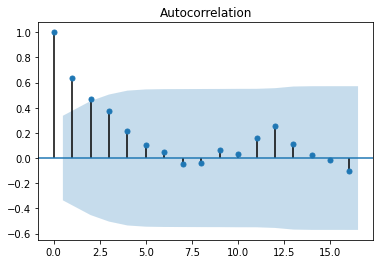

In [102]:
acf_plot=plot_acf(monthly_sales.item_cnt_monthly)

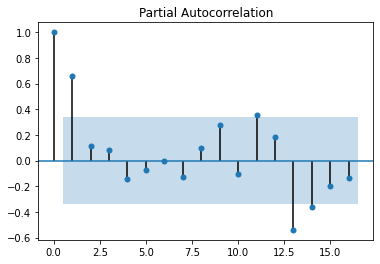

In [103]:
acf_plot=plot_pacf(monthly_sales.item_cnt_monthly)


*  ***From ACF plot we can see till around lag 2 it is important for moving avarage part***
*  ***From PACF plot we see lag 1 and,13 and 14 is important for autoregressive part*** 



In [104]:
adfuller(monthly_sales.item_cnt_monthly)

(-2.363950535143588,
 0.1521706092546734,
 0,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 531.1387242191759)

***From ADF test we can see that the time series is non stationary since p value is > 0.05***

## No of Items_per_shop

[Text(0.5, 1.0, 'Number of items in a shop')]

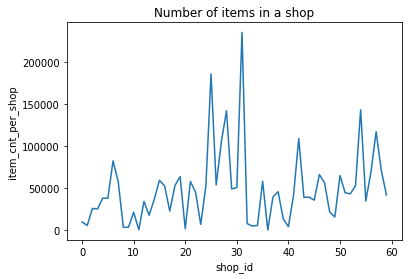

In [105]:
items_per_shop=pd.DataFrame(sales.groupby(["shop_id"])["item_id"].count().reset_index())
items_per_shop.rename(columns = {'item_id':'item_cnt_per_shop'}, inplace = True)
sns.lineplot(data=items_per_shop,x="shop_id",y="item_cnt_per_shop").set(
    title="Number of items in a shop")

***Certain shops have very high number of items compared to others***

In [106]:
sales=sales.merge(items[["item_id","item_category_id"]],on="item_id")
#sales.drop(["date"],axis=1,inplace=True)
sales=sales.sort_values('date').groupby(["date","date_block_num","shop_id","item_category_id","item_id"],as_index=False)
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
42989,01.01.2013,0,41,3402,549.0,1.0,30
1192079,01.01.2013,0,54,12864,248.0,1.0,40
83746,01.01.2013,0,2,1472,2599.0,1.0,23
847184,01.01.2013,0,54,10715,399.0,1.0,40
847518,01.01.2013,0,27,10450,349.0,1.0,40
...,...,...,...,...,...,...,...
2130328,31.12.2014,23,3,5660,1690.0,1.0,3
2130337,31.12.2014,23,56,5660,1690.0,1.0,3
2130339,31.12.2014,23,24,5660,1690.0,1.0,3
2130352,31.12.2014,23,21,5660,1690.0,1.0,3


In [107]:
sales=sales.agg({'item_price':['sum', 'mean'], 'item_cnt_day':['sum', 'mean']})
sales.head()

date date_block_num shop_id item_category_id item_id item_price  \
                                                                     sum   
0  01.01.2013              0       2                2    5649     2190.0   
1  01.01.2013              0       2               11   13434    13489.5   
2  01.01.2013              0       2               19    3320     1999.0   
3  01.01.2013              0       2               19    4464      599.0   
4  01.01.2013              0       2               19    6916      999.5   

           item_cnt_day       
      mean          sum mean  
0   2190.0          1.0  1.0  
1  13489.5          1.0  1.0  
2   1999.0          1.0  1.0  
3    599.0          1.0  1.0  
4    999.5          1.0  1.0

In [108]:
sales.columns = ["date",'date_block_num', 'shop_id', 'item_category_id', 'item_id','item_price', 'mean_item_price','item_cnt_monthly','item_cnt_mean']

In [109]:
month=[]
year=[]
month.append(sales["date"].apply(lambda x:int(x.split(".")[1])))
year.append(sales["date"].apply(lambda x:int(x.split(".")[2])))

In [110]:
sales["month"]=month[0]
sales["year"]=year[0]

# Total sales in the shops

Text(0.5, 1.0, 'Total sale in shops')

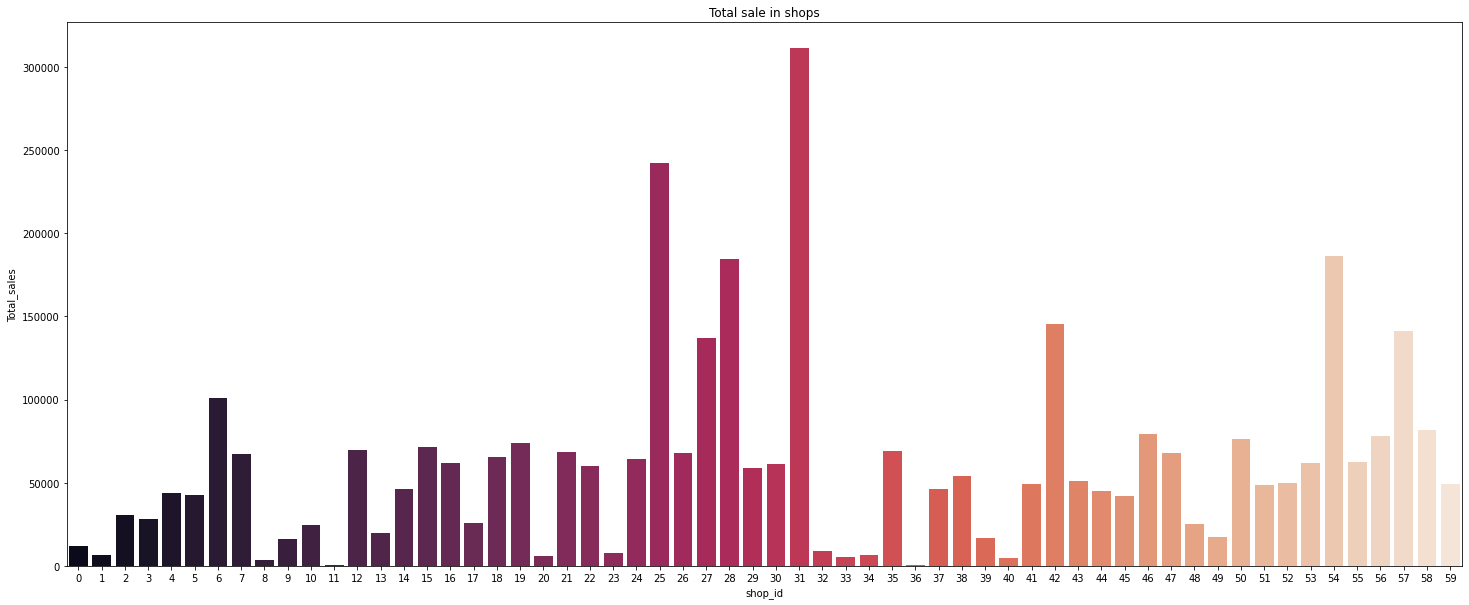

In [120]:
monthly_sales_per_shop=pd.DataFrame(sales.groupby(["shop_id"],as_index=False)["item_cnt_monthly"].sum())
monthly_sales_per_shop.rename(columns = {'item_cnt_monthly':'Total_sales'}, inplace = True)
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="shop_id", y="Total_sales", data=monthly_sales_per_shop,palette="rocket").set_title("Total sale in shops")

***The shops containing most items sales the most.***

# Total sales of each category of items

Text(0.5, 1.0, 'Total sales of item per category')

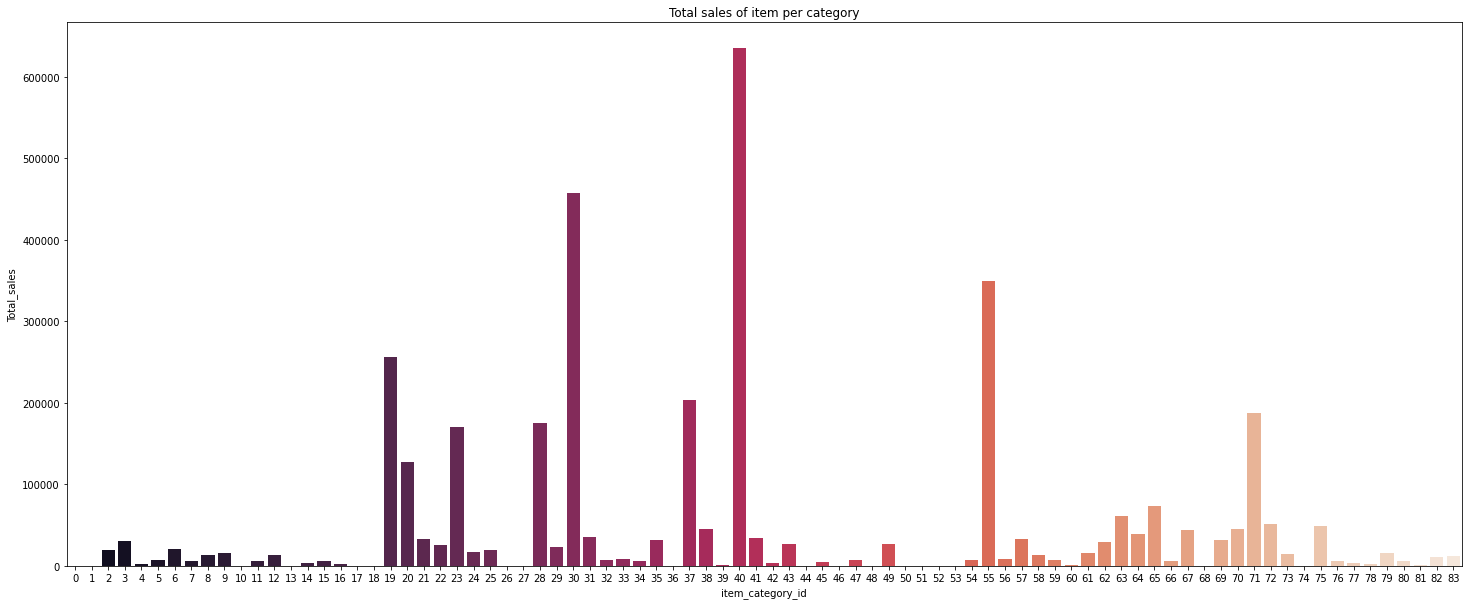

In [121]:
monthly_sales_item_cat=pd.DataFrame(sales.groupby(["item_category_id"],as_index=False)["item_cnt_monthly"].sum().reset_index())
monthly_sales_item_cat.rename(columns = {'item_cnt_monthly':'Total_sales'}, inplace = True)
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="item_category_id", y="Total_sales", data=monthly_sales_item_cat,palette="rocket").set_title("Total sales of item per category")


***Certain categories sales very high comapred to others.***

# Number of items in each category

Text(0.5, 1.0, 'No of items per category')

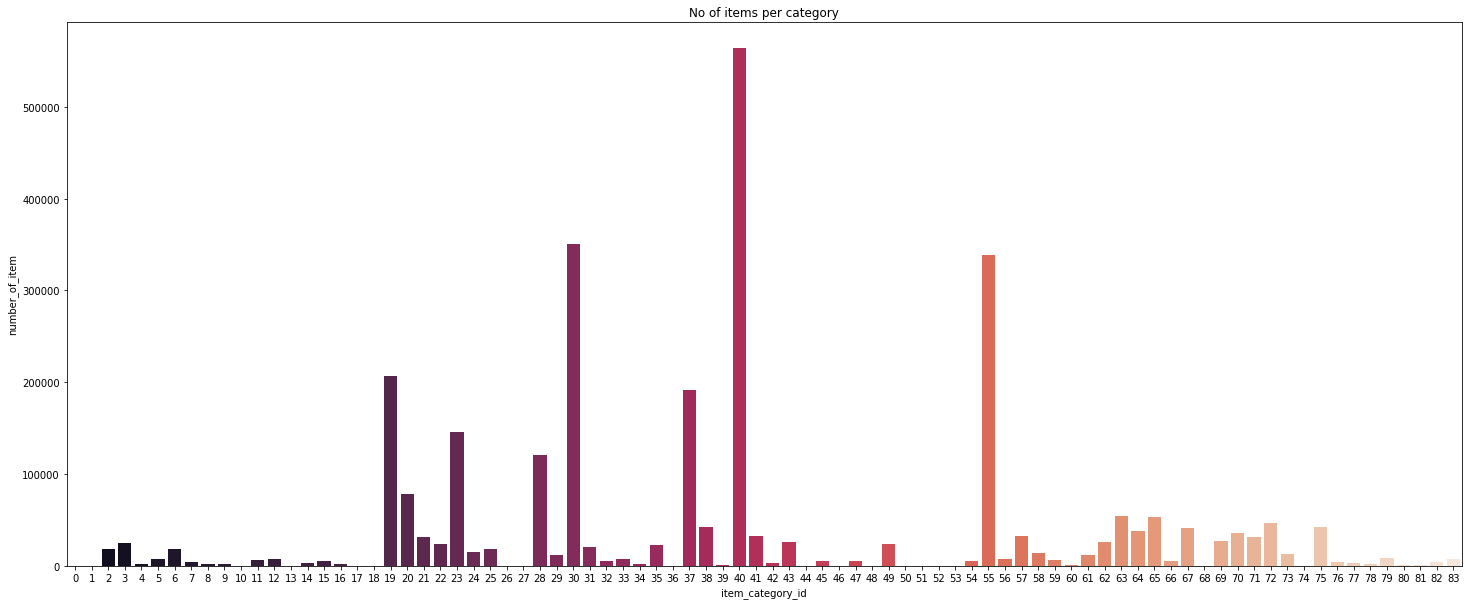

In [122]:
item_count_item_cat=pd.DataFrame(sales.groupby(["item_category_id"],as_index=False)["item_id"].count())
item_count_item_cat.rename(columns = {'item_id':'number_of_item'}, inplace = True)
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="item_category_id", y="number_of_item", data=item_count_item_cat,palette="rocket").set_title("No of items per category")


***Certain categories has very high number of items than the others***

# Number of categories in each shop

Text(0.5, 1.0, 'No of items categories in each shop')

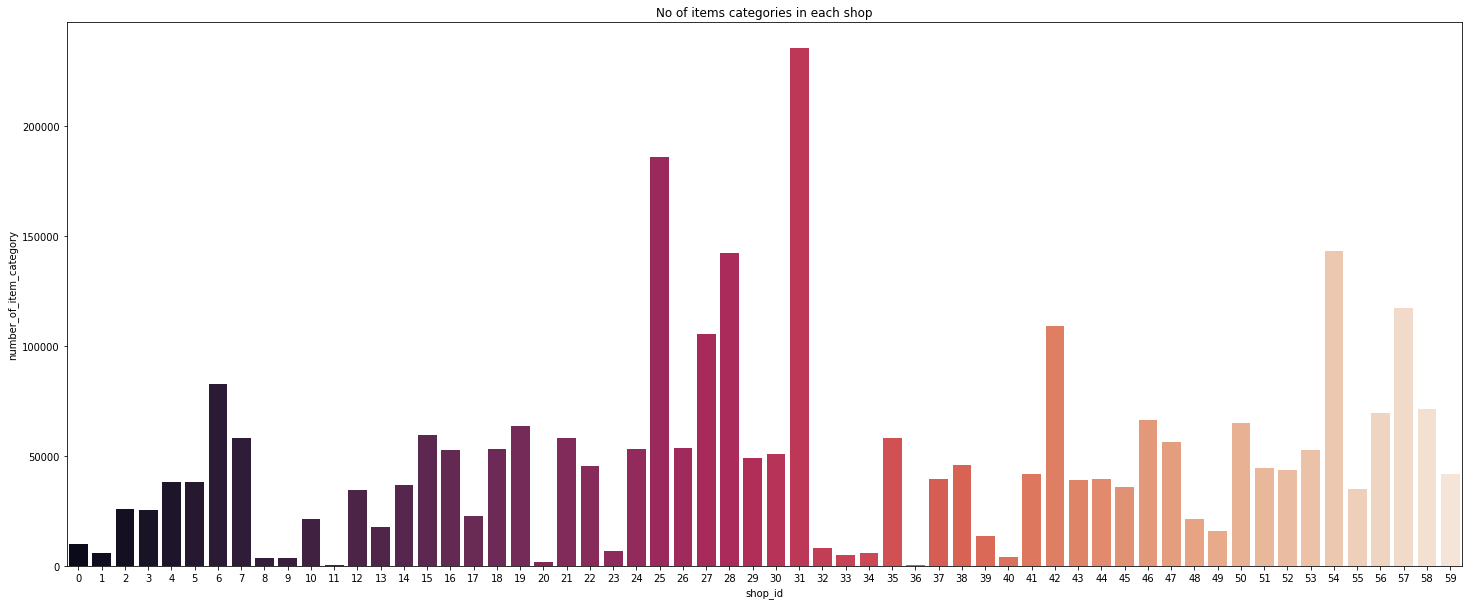

In [114]:
item_cat_count_shops=pd.DataFrame(sales.groupby(["shop_id"],as_index=False)["item_category_id"].count())
item_cat_count_shops.rename(columns = {'item_category_id':'number_of_item_category'}, inplace = True)
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="shop_id", y="number_of_item_category", data=item_cat_count_shops,palette="rocket").set_title("No of items categories in each shop")


***Certain shops has more number of categories than the others***

In [117]:
# sns.lineplot(data=sales,x="date_block_num",y="item_cnt_monthly")